Author - Tridev Parashar, Preethi Pothireddy, Elisavet Demetriou, Rajat Sawant, Mihir Salunke

Date - 14 Nov 2022

Description - The following python notebook aims to check the factors frequently quoted as reasons of job termination

### Load Modules and Import Dataset

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing Data and filtering
df=pd.read_csv('HRDataset_v14.csv.xls')
df1=df.loc[:, df.columns.isin(['EmploymentStatus','TermReason','Department','EngagementSurvey','EmpSatisfaction'])]
df2=df1[df1['EmploymentStatus'] !='Active'] 

### Data Cleansing and Plotting

In [3]:
#DataCleaning
df2.loc[df2["TermReason"] == "performance", "EmploymentStatus"] = 'Terminated for Cause'
df2.loc[df2['TermReason'] == "attendance", "EmploymentStatus"] = 'Terminated for Cause'
df2['TermReason'] = df2['TermReason'].replace(['Fatal attraction','Learned that he is a gangster','gross misconduct'], 'Others')
df2['Department'] = df2['Department'].replace(['IT/IS','Sales', 'Admin Offices','Software Engineering'], 'Other Departments')

In [4]:
#Categorizing the Data
Categories=['Another position','unhappy','more money','career change','hours','relocation out of area','return to school','retiring','military','medical issues','maternity leave - did not return','attendance','no-call, no-show','performance','Others']
Category_Term_Reason = pd.api.types.CategoricalDtype(categories=Categories, ordered=True)
df2['TermReason'] = df2['TermReason'].astype(Category_Term_Reason) 

In [5]:
#Groupingby
X=df2.groupby(['TermReason'])[['EmploymentStatus']].count()
Y=df2.groupby(['Department','TermReason']).agg(['count']).unstack(fill_value=0).stack()
Y=Y.loc['Other Departments']
Rates=  df2.groupby(['TermReason'])[["EmpSatisfaction","EngagementSurvey"]].mean()

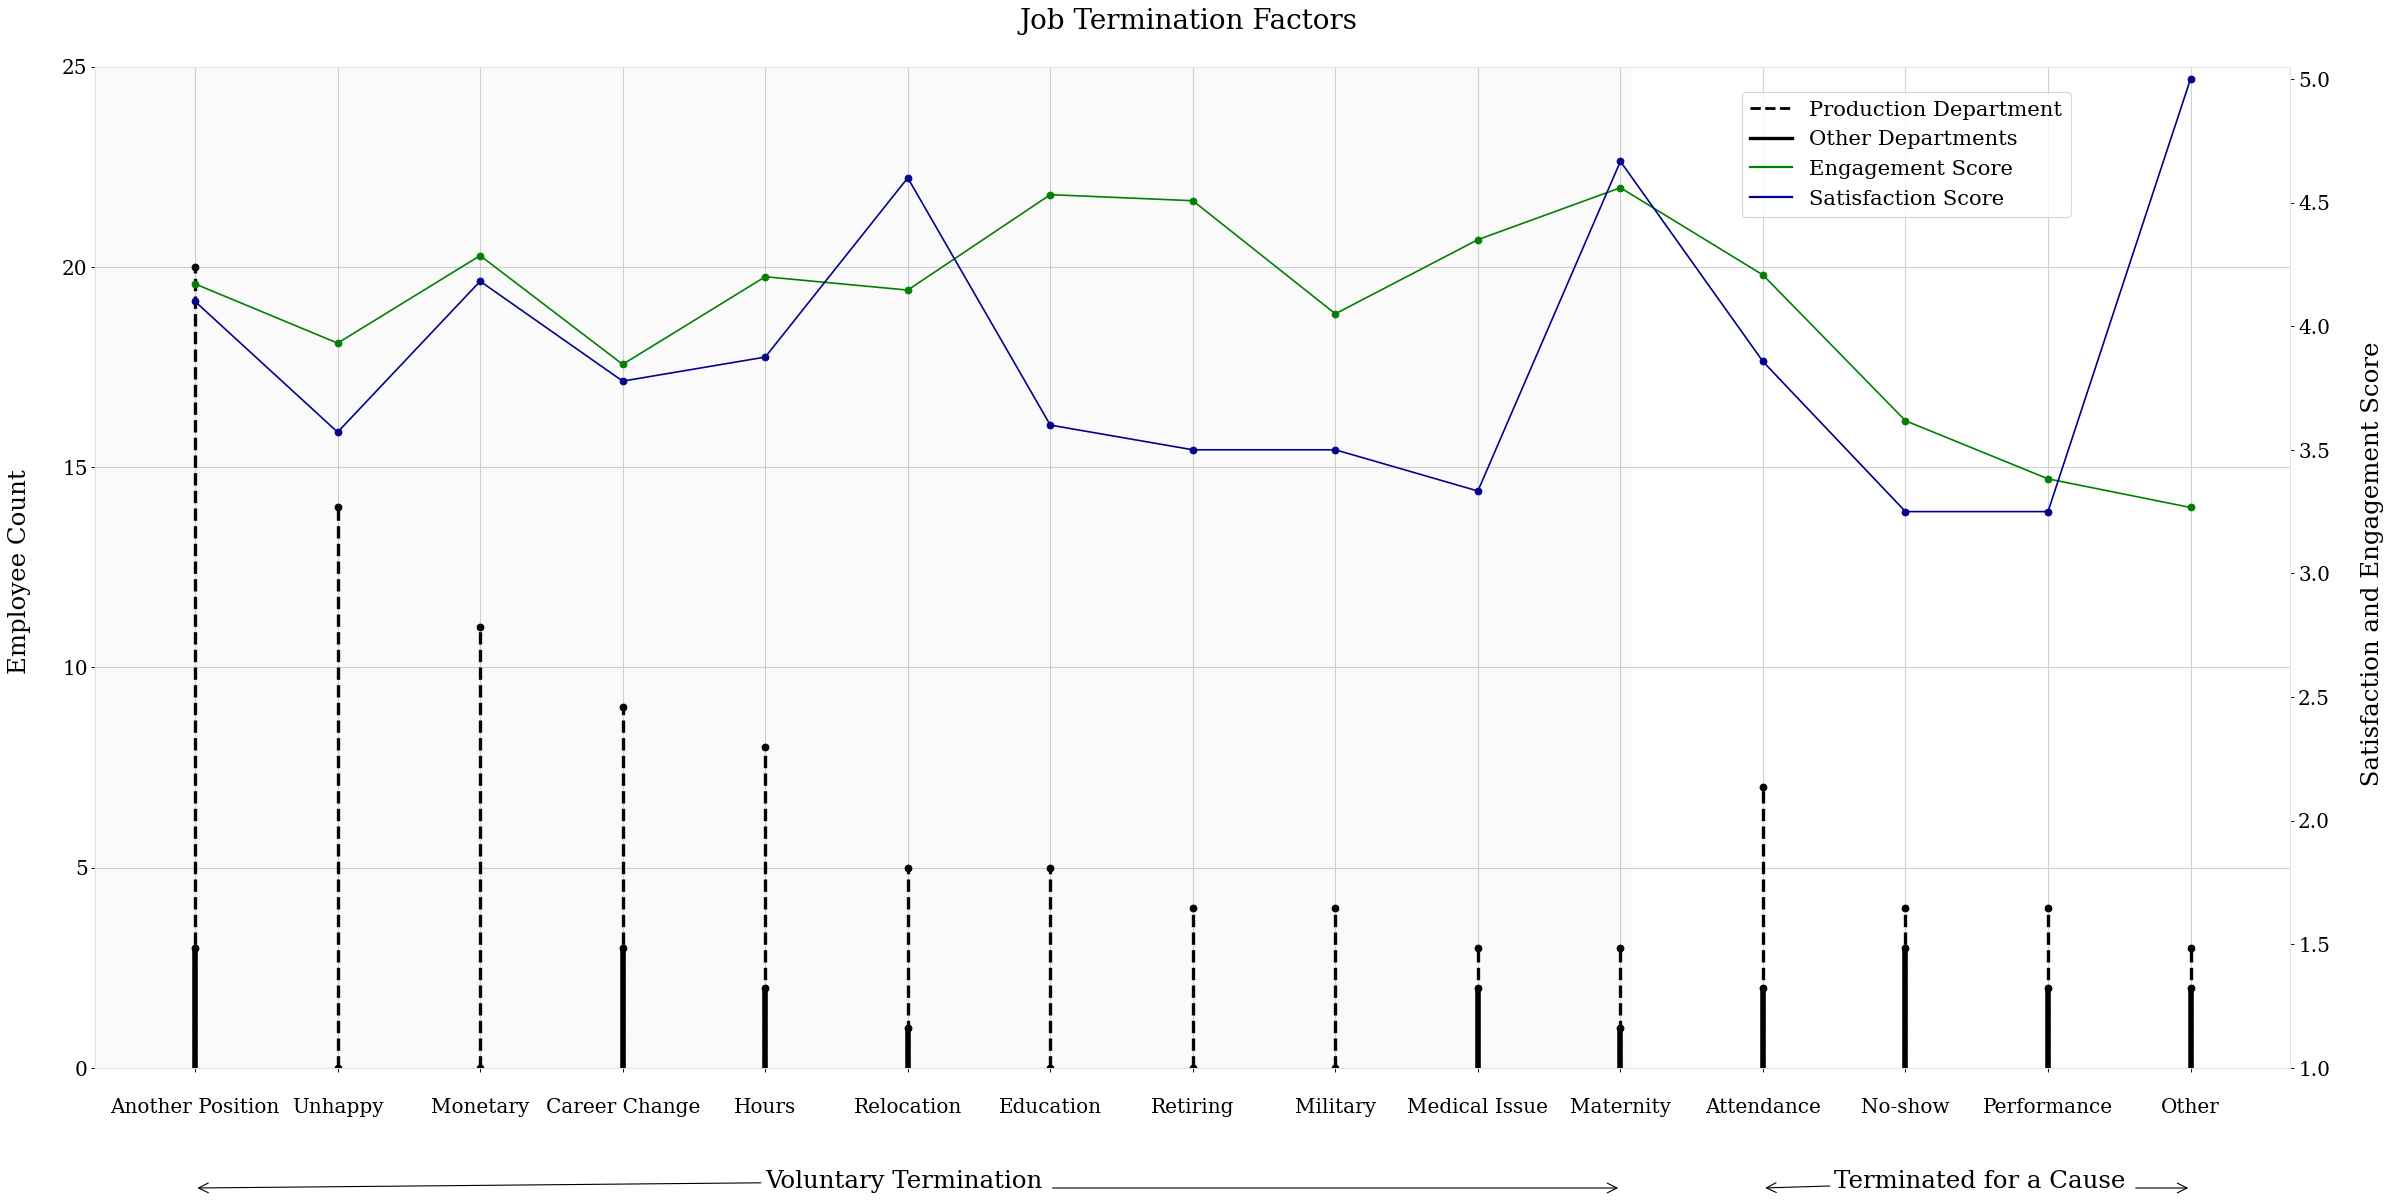

In [6]:
#Plotting the data
plt.rcParams['font.family']='Serif'
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 

fig1, ax1 = plt.subplots(figsize=(30,15), dpi= 80)
ax1.vlines(X.index, ymin=0,ymax=X.EmploymentStatus.values,color='black',linestyle='--',linewidth=3)
ax1.plot(X.index, X.EmploymentStatus.values, "o",color='black')
ax1.set_ylim(0,25)
ax1.grid(linestyle='-', linewidth=0.99,color='lightgrey')
ax1.set_ylabel('Employee Count \n',size=22)

ax3 = ax1.twinx()
ax3.plot(Rates.index,Rates.EngagementSurvey,color='green',marker='o')
ax3.plot(Rates.index,Rates.EmpSatisfaction,color='darkblue',marker='o')
ax3.set_ylim(1,5.05)
ax3.set_ylabel('\n Satisfaction and Engagement Score',size=22)

ax2 = ax1.twinx()
ax2.vlines(Y.index, ymin=0,ymax=Y.EmploymentStatus.values,color='black',linestyle='-',linewidth=5)
ax2.plot(Y.index, Y.EmploymentStatus.values, "o",color='black')
ax2.set_ylim(0,25)
ax2.get_yaxis().set_visible(False)
ax2.spines[['bottom','top','right','left']].set_color('white')

#Modifying labels, annotating and inserting legend
ax1.set_xticklabels(['\nAnother Position', '\nUnhappy','\nMonetary','\nCareer Change','\nHours', '\nRelocation','\nEducation','\nRetiring','\nMilitary','\nMedical Issue','\nMaternity','\nAttendance','\nNo-show','\nPerformance','\nOther'])

ax1.annotate('Voluntary Termination', size=22,xy=(0, -3),xytext=(4,-3), arrowprops=dict(arrowstyle='->',facecolor='black',linewidth=1),annotation_clip=False)
ax1.annotate('', size=22, xy=(6, -3),xytext=(10,-3), arrowprops=dict(arrowstyle='<-',facecolor='black',linewidth=1),annotation_clip=False)
ax1.annotate('Terminated for a Cause',size=22, xy=(11, -3),xytext=(11.5,-3), arrowprops=dict(arrowstyle='->',facecolor='black'),annotation_clip=False)
ax1.annotate('',size=22, xy=(13.6, -3),xytext=(14,-3), arrowprops=dict(arrowstyle='<-',facecolor='black'),annotation_clip=False)

legend_elements = [Line2D([0], [0], color='black', ls='--',lw=2.5, label='Production Department'),
                   Line2D([0], [0], color='black', ls='-',lw=3, label='Other Departments'),
                   Line2D([0], [0], color='green', ls='-',lw=2, label='Engagement Score'),
                   Line2D([0], [0], color='darkblue', ls='-',lw=2, label='Satisfaction Score')]
ax1.legend(handles=legend_elements,loc=(0.75,0.85),fontsize=19)


plt.axhspan(ymin=0, ymax=25,xmin=0,xmax=0.7,facecolor='grey', alpha=0.04)
plt.title('Job Termination Factors \n',size=25)
fig1.tight_layout()
plt.savefig('Job_Termination_Factors.png',bbox_inches='tight')
plt.show()